In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [18]:
train_path = '../input/chest-xray-pneumonia/chest_xray/train'
valid_path = '../input/chest-xray-pneumonia/chest_xray/test'

In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [9]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [14]:
 # useful for getting number of classes
folders = glob('../input/chest-xray-pneumonia/chest_xray/train/*')

In [15]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [16]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [21]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [23]:
training_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [24]:
test_set = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [25]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 122s 751ms/step - loss: 0.2073 - accuracy: 0.9174 - val_loss: 0.2384 - val_accuracy: 0.9247
Epoch 2/5
163/163 [==============================] - 108s 664ms/step - loss: 0.1084 - accuracy: 0.9571 - val_loss: 0.2536 - val_accuracy: 0.9151
Epoch 3/5
163/163 [==============================] - 109s 669ms/step - loss: 0.1221 - accuracy: 0.9532 - val_loss: 0.2976 - val_accuracy: 0.9135
Epoch 4/5
163/163 [==============================] - 109s 666ms/step - loss: 0.0846 - accuracy: 0.9672 - val_loss: 0.3555 - val_accuracy: 0.9103
Epoch 5/5
163/163 [==============================] - 108s 664ms/step - loss: 0.0667 - accuracy: 0.9770 - val_loss: 0.2777 - val_accuracy: 0.9151


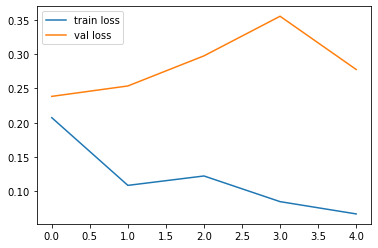

<Figure size 432x288 with 0 Axes>

In [26]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [28]:
import tensorflow as tf

from keras.models import load_model

model.save('final_model.h5')